<a href="https://colab.research.google.com/github/gundasai/deeplearning/blob/master/pcb%20aug%20trail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
import os
os.chdir('/content/drive/My Drive/Aug_PCB')
os.getcwd()

'/content/drive/My Drive/Aug_PCB'

In [3]:
import numpy as np
a=np.load("s_x_train.npy")
b=np.load("s_y_train.npy")
print(a.shape)
print(b.shape)

(5040, 300, 300, 3)
(5040,)


In [0]:
from sklearn.utils import shuffle
(a,b)=shuffle(a,b)

In [0]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(a, b, test_size=0.33, random_state=42)

In [6]:
print(xtrain.shape)
print(ytrain.shape)

print(xtest.shape)
print(ytest.shape)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtest.ndim)
print(xtest.dtype)

(3376, 300, 300, 3)
(3376,)
(1664, 300, 300, 3)
(1664,)
4
float32
4
float32
4
float32


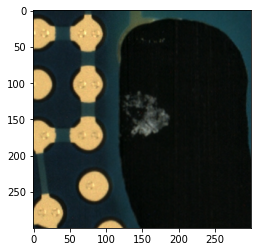

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(xtest[0], cmap='brg')

In [0]:
xtrain = xtrain.astype('float32')
xtest  = xtest.astype('float32')

In [9]:
print(xtrain.shape)
print(ytrain.shape)

(3376, 300, 300, 3)
(3376,)


In [10]:
#keras.utils.normalize(a, axis=-1, order=2)
print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

print (np.max(ytrain),np.max(ytest))
print (np.min(ytrain),np.min(ytest))

mean = np.mean(xtrain)
std  = np.std(xtrain)

print(mean)
print(std)

xtrain -= mean
xtrain /= std

xtest -= mean
xtest /= std

print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

1.0 1.0
0.0 0.0
1.0 1.0
0.0 0.0
0.20945065
0.20864616
3.7889473 3.7889473
-1.0038557 -1.0038557


In [11]:
from keras.utils import to_categorical
ytrain = to_categorical(ytrain)
ytest  =  to_categorical(ytest)
print(ytest[0])

Using TensorFlow backend.


[0. 1.]


In [12]:
print(xtrain.shape)
print(ytrain.shape)

(3376, 300, 300, 3)
(3376, 2)


In [13]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Activation
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import add
from keras.utils import plot_model
import keras

input1 = keras.layers.Input(shape=(300,300,3))
x0=keras.layers.ZeroPadding2D(padding=(3, 3))(input1)

x1 = Conv2D(300,(7,7),strides=(2,2) ,activation='relu')(x0)
x2=keras.layers.BatchNormalization(axis = 3)(x1)
x3= Activation('relu')(x2)
x4= MaxPooling2D((3, 3), strides=(2, 2))(x3)

x5= Conv2D(200,(2,2),strides=(2,2) ,activation='relu')(x4)
x6=keras.layers.BatchNormalization(axis = 3)(x5)
x7= Activation('relu')(x6)
x8= MaxPooling2D((3, 3), strides=(2, 2))(x7)

x9= Conv2D(100,(2,2),strides=(2,2) ,activation='relu')(x8)
x10=keras.layers.BatchNormalization(axis = 3)(x9)
x11= Activation('relu')(x10)
x12= MaxPooling2D((3, 3), strides=(2, 2))(x11)

x13= Conv2D(50,(3,3),strides=(1,1) ,activation='relu')(x12)
x14= Conv2D(40,(2,2),strides=(1,1) ,activation='relu')(x13)
x15= Conv2D(30,(1,1),strides=(1,1) ,activation='relu')(x14)

x15=keras.layers.ZeroPadding2D(padding=(2, 2))(x15)
x16=keras.layers.BatchNormalization(axis = 3)(x15)
x17= Activation('relu')(x16)
x18= MaxPooling2D((2, 2), strides=(1, 1))(x17)

x18=keras.layers.ZeroPadding2D(padding=(3, 3))(x18)
x19= Conv2D(10,(2,2),strides=(2,2) ,activation='relu')(x18)
x20=keras.layers.BatchNormalization(axis = 3)(x19)
x21= Activation('relu')(x20)
x22= MaxPooling2D((3, 3), strides=(2, 2))(x21)


x23=keras.layers.ZeroPadding2D(padding=(1, 1))(x22)
x24= Conv2D(10,(2,2),strides=(2,2) ,activation='relu')(x23)
x25=keras.layers.BatchNormalization(axis = 3)(x24)
x26= Activation('relu')(x25)
x27= MaxPooling2D((2, 2), strides=(1, 1))(x26)





o=keras.layers.Flatten()(x27)








out = keras.layers.Dense(100,activation="relu")(o)
out = keras.layers.Dense(50,activation="relu")(out)
out = keras.layers.Dense(10,activation="relu")(out)
out1=keras.layers.Dense(2,activation="softmax")(out)

model = keras.models.Model(inputs=input1, outputs=out1)

model.summary()













Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 300, 300, 3)       0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 306, 306, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 300)     44400     
_________________________________________________________________
batch_normalization_1 (Batch (None, 150, 150, 300)     1200      
_________________________________________________________________
activation_1 (Activation)    (None, 150, 150, 300)     0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 300)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 200

In [0]:
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

In [15]:
print(xtrain.shape)
print(ytrain.shape)

(3376, 300, 300, 3)
(3376, 2)


In [16]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])
#model.compile(optimizer='rmsprop', loss='categorical_crossentropy' ,metrics=['accuracy'])
history=model.fit(xtrain, ytrain, validation_split=(0.33), batch_size=20,epochs=8, verbose=1)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 2261 samples, validate on 1115 samples
Epoch 1/8
2261/2261 [==============================] - 517s 229ms/step - loss: 0.6667 - acc: 0.6126 - val_loss: 0.6490 - val_acc: 0.6529
Epoch 2/8
2261/2261 [==============================] - 516s 228ms/step - loss: 0.5658 - acc: 0.7881 - val_loss: 0.5975 - val_acc: 0.7731
Epoch 3/8
2261/2261 [==============================] - 515s 228ms/step - loss: 0.5290 - acc: 0.7886 - val_loss: 0.5282 - val_acc: 0.7812
Epoch 4/8
2261/2261 [==============================] - 517s 229ms/step - loss: 0.4178 - acc: 0.8651 - val_loss: 0.5589 - val_acc: 0.7148
Epoch 5/8
2261/2261 [==============================] - 514s 227ms/step - loss: 0.3782 - acc: 0.8775 - val_loss: 0.4596 - val_acc: 0.7991
Epoch 6/8
2261/2261 [==============================] - 517s 228ms/step - loss: 0.3179 - acc: 0.9071 - val_loss: 0.3356 - val_acc: 0.9022
Epoch 7/8
2261/2261 [===========

In [17]:
model.evaluate(xtest,ytest)

1664/1664 [==============================] - 134s 80ms/step


[0.7878809938063989, 0.5048076923076923]

In [18]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtest)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1']
print(classification_report(np.argmax(ytest,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00       824
     class 1       0.50      1.00      0.67       840

    accuracy                           0.50      1664
   macro avg       0.25      0.50      0.34      1664
weighted avg       0.25      0.50      0.34      1664



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
model.evaluate(xtrain,ytrain)

3376/3376 [==============================] - 276s 82ms/step


[0.7898353739372362, 0.4976303317535545]

In [20]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtrain)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1']
print(classification_report(np.argmax(ytrain,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00      1696
     class 1       0.50      1.00      0.66      1680

    accuracy                           0.50      3376
   macro avg       0.25      0.50      0.33      3376
weighted avg       0.25      0.50      0.33      3376



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
